In [1]:
import pandas as pd 
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib 

In [2]:
# -------- NORM FUNCTIONS --------
def norm1(v):   return np.abs(v).sum()
def norm2(v):   return np.sqrt((v**2).sum())
def norm_inf(v):    return np.max(np.abs(v))

In [8]:
# -------- SAMPLE BASE POINTS --------
N = 200000
pts3 = np.random.uniform(-1, 1, (N, 3))

values = np.linspace(-1, 1, 51)
eps = 0.02  # IMPORTANT for L1 norm

frames = []
steps = []


In [9]:
norm = norm2

In [10]:
for idx, w0 in enumerate(values):

    pts4 = np.column_stack([pts3, np.full(N, w0)])
    vals = np.apply_along_axis(norm, 1, pts4)

    mask = (vals > 1-eps) & (vals < 1+eps)
    pts_slice = pts3[mask]

    x, y, z = pts_slice[:,0], pts_slice[:,1], pts_slice[:,2]

    frame = go.Frame(
        data=[
            go.Scatter3d(
                x=x, y=y, z=z,
                mode='markers',
                marker=dict(size=2)
            )
        ],
        name=str(idx)
    )

    frames.append(frame)

    steps.append(
        dict(
            method="animate",
            args=[
                [str(idx)],
                dict(
                    frame=dict(duration=0, redraw=True),
                    mode="immediate",
                    transition=dict(duration=0)
                )
            ],
            label=f"{w0:.2f}"
        )
    )


In [5]:
#-------- INITIAL FRAME --------
w0 = values[0]
pts4 = np.column_stack([pts3, np.full(N, w0)])
vals = np.apply_along_axis(norm, 1, pts4)
mask = (vals > 1-eps) & (vals < 1+eps)
pts_slice = pts3[mask]

x, y, z = pts_slice[:,0], pts_slice[:,1], pts_slice[:,2]

fig = go.Figure(
    data=[
        go.Scatter3d(
            x=x, y=y, z=z,
            mode='markers',
            marker=dict(size=2)
        )
    ],
    layout=go.Layout(
        sliders=[
            dict(
                steps=steps,
                currentvalue=dict(prefix="w = "),
                pad=dict(t=50),
                transition=dict(duration=0),
            )
        ],
        scene=dict(
            xaxis=dict(range=[-1, 1]),
            yaxis=dict(range=[-1, 1]),
            zaxis=dict(range=[-1, 1]),
            aspectmode='cube'
        )
    ),
    frames=frames
)

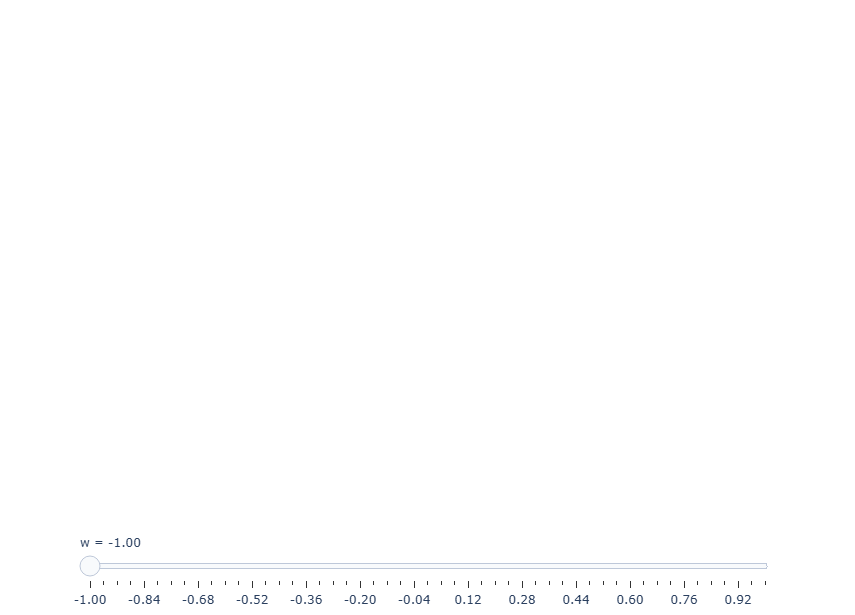

In [6]:
fig.update_layout(
    width=900,
    height=600
)